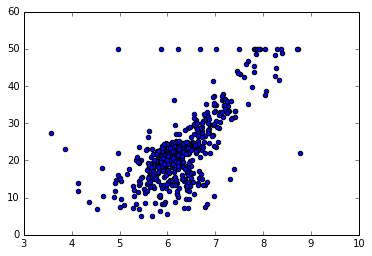

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
%matplotlib inline

boston = datasets.load_boston()
roomsize = boston.data[:, 5]
house_prices = boston.target

plt.scatter(roomsize, house_prices)
plt.show()





In [13]:
x_0 = np.ones(len(roomsize))
x_1 = roomsize
X = np.column_stack((x_0, x_1))
y = house_prices.reshape(len(house_prices), 1)
theta = np.matrix(np.array([0,0]))
X.shape, theta.shape, y.shape

def costfunction(X, y, theta):
    differ= np.power(((X * theta.T) - y), 2)
    return np.sum(differ) / (2 * len(X))

def Descentgradient(X, y, theta, alpha, epoch):
    slope = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(epoch)
    
    for i in range(epoch):
        error = (X * theta.T) - y
    
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            slope[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        
        theta = slope
        cost[i] = costfunction(X, y, theta)
    
    return theta, cost                                   

In [14]:
alpha = 0.00001
iters = 1000
g, cost = Descentgradient(X, y, theta, alpha, iters)
g

matrix([[ 0.5564119 ,  3.49684533]])

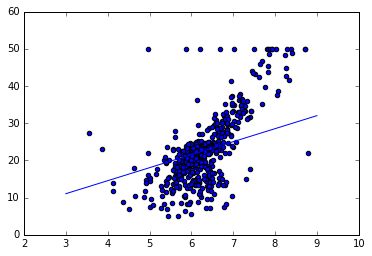

In [15]:
plt.scatter(roomsize, house_prices)
ax = np.arange(3, 10, 1)
ay = g[0, 1] * ax + g[0, 0]
plt.plot(ax, ay)
plt.show()


In [16]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'housing/housing.data',
                 header=None,
                 sep='\s+')

In [17]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
              'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [18]:
df.shape

(506, 14)

In [23]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df['MEDV']
print(X.shape)
print(y.shape)
print(X)
print(y)

(506, 13)
(506,)
         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9     0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10    0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11    0.11747  12.5   7.87     0  0.524  6.009   82.9  6.22

In [24]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(303, 13)
(303,)
(203, 13)
(203,)


In [27]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print(lr.coef_, '\n')
print(lr.intercept_)

[ -1.42692244e-01   4.56326411e-02   9.54942747e-02   3.32739202e+00
  -2.10100357e+01   4.28616163e+00   1.26721547e-02  -1.54378686e+00
   3.98466497e-01  -1.30943188e-02  -1.00262882e+00   1.07240025e-02
  -6.11956018e-01] 

35.3220272065


In [32]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.755915802573
0.657028266793


In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


In [34]:
X = df[['RM']].values
y = df[['MEDV']].values 

In [36]:
reg = LinearRegression()

In [45]:
quadrat = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadrat.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [39]:
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
reg = reg.fit(X, y)
y_lin_fit = reg.predict(X_fit)
linear_r2 = r2_score(y, reg.predict(X))

In [46]:
reg = reg.fit(X_quad, y)
y_quad_fit = reg.predict(quadrat.fit_transform(X_fit))
quadrat_r2 = r2_score(y, reg.predict(X_quad))

In [48]:
reg = reg.fit(X_cubic, y)
y_cubic_fit = reg.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, reg.predict(X_cubic))

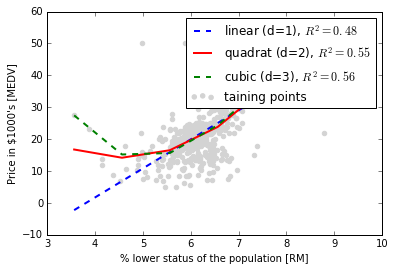

In [54]:
plt.scatter(X, y, label='taining points', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label='linear (d=1), $R^2=%.2f$' % linear_r2,
         color='blue',
         lw=2,
         linestyle='--')
plt.plot(X_fit, y_quad_fit, 
         label='quadrat (d=2), $R^2=%.2f$' % quadrat_r2,
         color='red', 
         lw=2,
         linestyle='-')
plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')
         
plt.xlabel('% lower status of the population [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')
plt.show()

linear_model